In [2]:
import numpy as np
import matplotlib.pyplot as plt

В классическом машинном обучении матрица признаков  - это матрица, в которой одна строка есть признаки для одного объекта. Мы сегодня будем рассматривать немного по другому, так как рассматривают обычно в статистике (транспонированную версию этой матрицы) - каждый объект это столбец

In [3]:
#Пространство признаков для объекта (стаж репетиторы)
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

Как думаете, для чего тут есть строка состоящая из единиц?

In [4]:
X.T

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [5]:
# Целевая переменная (средний балл ЕГЭ)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

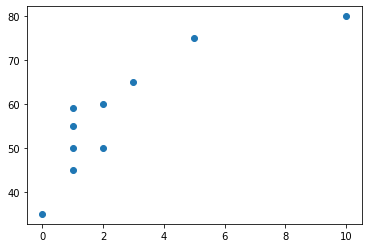

In [6]:
plt.scatter(X[1,:], y)
# y = a*x + b

In [7]:
y = a*X[1]*b*X[0]

NameError: name 'a' is not defined

Уравнение прямой для одного признака будет задаваться уравнением y = a*x + b. За что отвечает a, за что отвечает b?

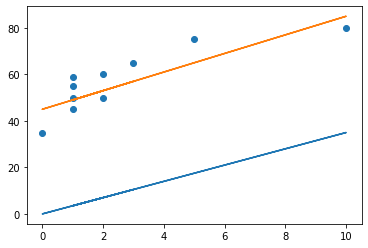

In [8]:
plt.scatter(X[1,:], y)
plt.plot(X[1, :], 3.5*X[1, :] )
plt.plot(X[1, :], 4*X[1, :] + 45)

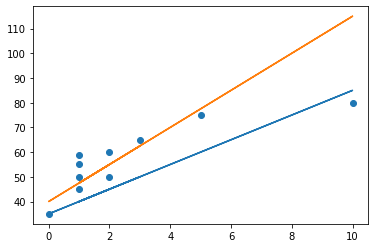

In [9]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5)
plt.plot(X[1], 40*X[0] + X[1]*7.5)

# mse - mean squared error
# mae - mean absolute error

In [10]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [11]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [12]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

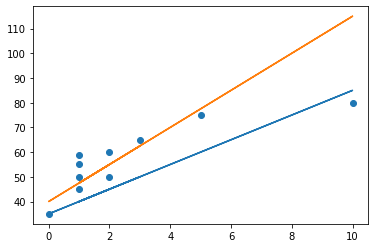

In [13]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1)
plt.plot(X[1], y_pred2)

In [14]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [15]:
err1, err2

(9.4, -2.1)

In [16]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [17]:
mae_1, mae_2

(10.4, 7.9)

In [18]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [19]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [20]:
X.shape

(2, 10)

In [21]:
X.T.shape

(10, 2)

In [22]:
X.dot(X.T)

array([[ 10,  26],
       [ 26, 146]])

In [23]:
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

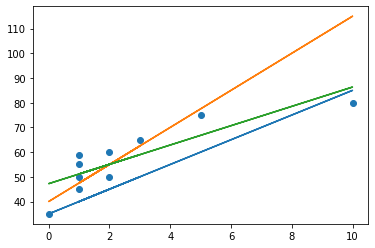

In [24]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [25]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [26]:
calc_mse(y, y_pred1)

143.6

In [27]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [28]:
calc_mae(y, y_pred1)

10.4

In [29]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [30]:
calc_mse(y, y_pred3)

45.93750000000002

In [31]:
calc_mae(y, y_pred3)

6.182142857142859

Градиентный спуск

In [36]:
np.mean(y_pred - y)**2
np.mean(w*x - y)**2
np.sum(w*x - y)**2 / n
1/n * np.sum((w*x - y)**2)
(w*x - y)**2

2*z

2*x*(w*x - y) 
2*x*(w*x - y)

NameError: name 'y_pred' is not defined

In [37]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [38]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [39]:
W[0] - g

47.2321430605

1. Подберите скорость обучения (alpha) и количество итераций:

In [42]:
n = X.shape[1]
alpha = 0.0010696615257686504
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0010696615257686504)

In [43]:
for i in range(1000):
    y_pred = np.dot(W, X)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    err = calc_mse(y, y_pred)
    if i % 100 == 0:
        print(i, W, err)

0 [1.1178767  0.86368492] 3173.15
100 [ 7.74387926 10.76715126] 885.7712957721524
200 [11.96920094 10.40589261] 715.8340218328605
300 [15.68541418  9.73544177] 582.1607825889774
400 [19.00784134  9.12252423] 475.1637898819089
500 [21.98027733  8.57366355] 389.5167811301624
600 [24.63966884  8.08258741] 320.9596158557243
700 [27.01898733  7.64322808] 266.0822187413707
800 [29.14772873  7.2501397 ] 222.15495450878976
900 [31.05228247  6.89844928] 186.99285418289307


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [38]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [39]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

0 [1.04502 0.54502] 3173.15
100 [4.71884428 4.21884428] 1795.372786768742
200 [7.1402917 6.6402917] 1196.8339637692059
300 [8.73628737 8.23628737] 936.814623053387
400 [9.78822107 9.28822107] 823.8561064989115
500 [10.48155912  9.98155912] 774.784270430637
600 [10.93854386 10.43854386] 753.4663108064917
700 [11.23974622 10.73974622] 744.2052878053473
800 [11.43827114 10.93827114] 740.1820816195831
900 [11.56912052 11.06912052] 738.4343062376228


In [ ]:
colab.research.google.com

In [0]:
tlg: @emiliyam